In [1]:
import pandas as pd

pima_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/diabetes.csv'

pima = pd.read_csv(pima_url)
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [2]:
## 데이터를 불러온 후 데이터 확인 info 
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
pima = pima.astype('float')
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


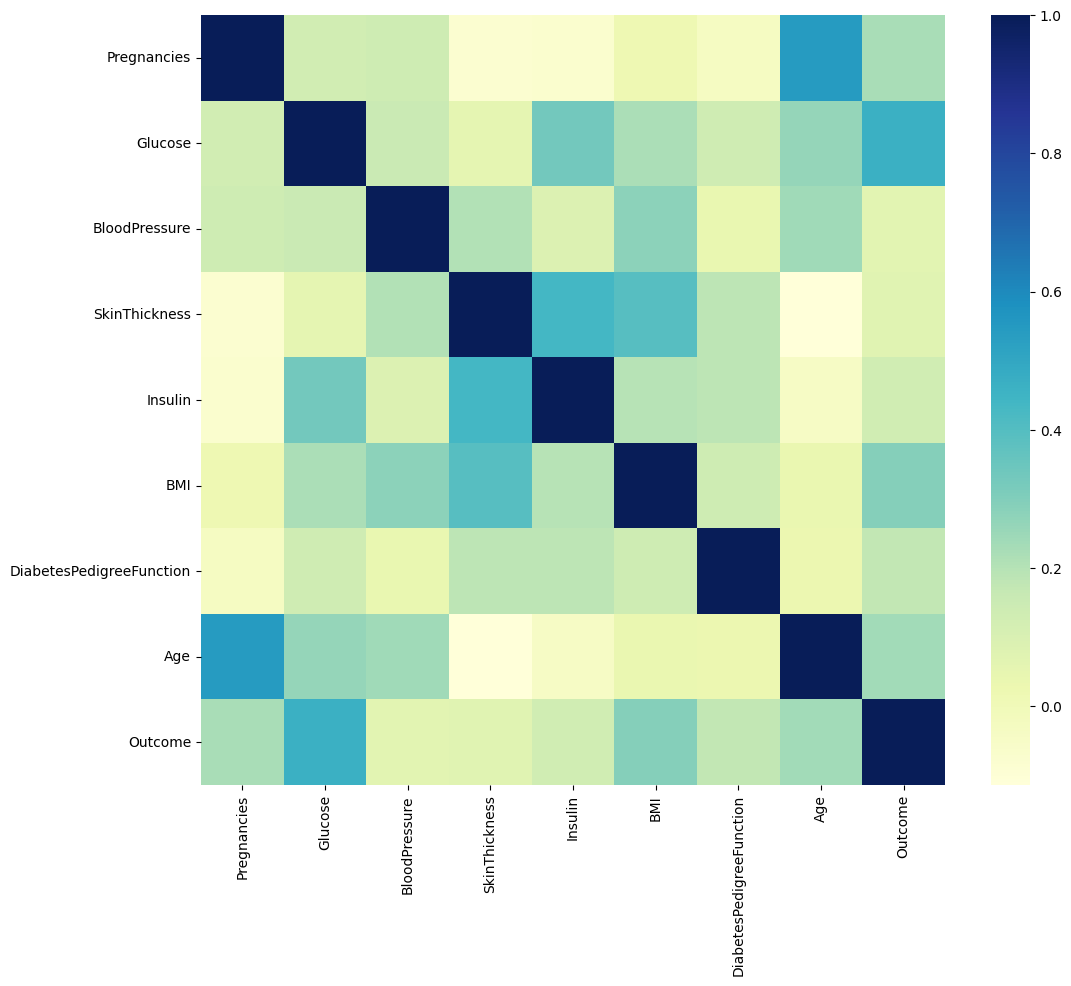

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,10))
sns.heatmap(pima.corr(), cmap = 'YlGnBu')
## corr()하면 데이터의 상관관계를 볼 때 사용한다.
plt.show()

In [6]:
## 결측치에 대한 고려 

(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [7]:
zerofeatures = ['Glucose','BloodPressure', 'SkinThickness', 'BMI']
pima[zerofeatures] = pima[zerofeatures].replace(0, pima[zerofeatures].mean())
## replace 함수를 통해 결측 데이터를 평균으로 변환 

(pima==0).astype(int).sum()

Pregnancies                 111
Glucose                       0
BloodPressure                 0
SkinThickness                 0
Insulin                     374
BMI                           0
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

X = pima.drop(['Outcome'], axis =1)
y = pima['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X,y ,test_size=0.2, random_state=13, stratify= y)

## stratify 파라미터 
## 데이터 비율을 유지한 채로 데이터를 split 함 train과 test로 

In [9]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler



estimators = [('scaler' , StandardScaler()), ('clf', LogisticRegression(solver='liblinear', random_state=13))]
## scaler 적용시키고 , decisiontree 적용시기키기  => 모델 만들어짐

In [10]:
pipe_lr = Pipeline(estimators)
pipe_lr.fit(X_train, y_train)
pred = pipe_lr.predict(X_test)

In [11]:
from sklearn.metrics import(accuracy_score, recall_score, precision_score, roc_auc_score, f1_score)

print('accuracy :', accuracy_score(y_test, pred))
print('recall :', recall_score(y_test, pred))
print('precision :', precision_score(y_test, pred))
print('AUCscore :', roc_auc_score(y_test, pred))
print('F1score :', f1_score(y_test, pred))



accuracy : 0.7727272727272727
recall : 0.6111111111111112
precision : 0.7021276595744681
AUCscore : 0.7355555555555556
F1score : 0.6534653465346535


In [13]:
coeff = list(pipe_lr['clf'].coef_[0])
labels = list(X_train.columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

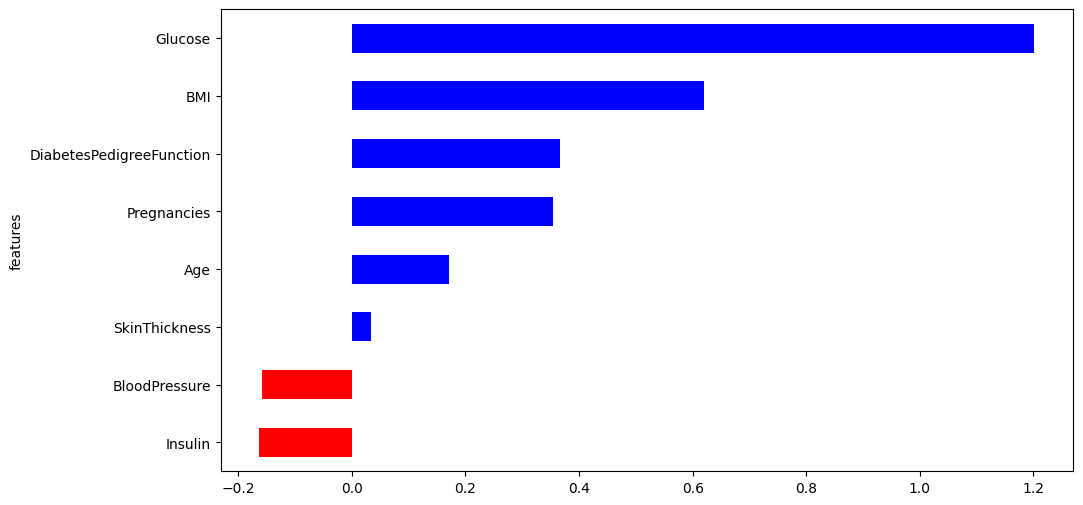

In [15]:
features = pd.DataFrame({'features' : labels, 'importance': coeff})
features.sort_values(by=['importance'], ascending = True, inplace = True)
features['positive'] = features['importance'] > 0
features.set_index('features', inplace = True)
features['importance'].plot(kind = 'barh', figsize=(11,6), color = features['positive'].map({True :'blue', False: 'red'}))
plt.show()